In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading the data
d0 = pd.read_csv('train.csv')

# print first five rows of d0.
print(d0.head(5)) 

# save the labels into a variable l.
labels = d0['label']

# Drop the label feature and store the pixel data in d.
data = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
# Finding the size of data
print(data.shape)
print(labels.shape)

(42000, 784)
(42000,)


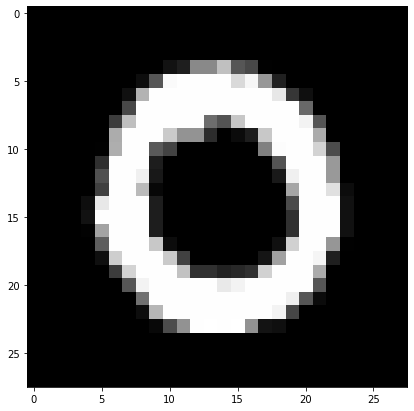

0


In [3]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1
# reshape from 1d to 2d pixel array
grid_data = data.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()
print(labels[idx])

In [5]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(42000, 784)


In [6]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [7]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [8]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultant new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultant new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [11]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


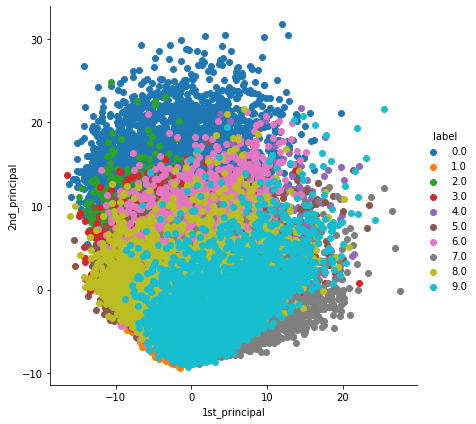

In [12]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

<AxesSubplot:xlabel='1st_principal', ylabel='2nd_principal'>

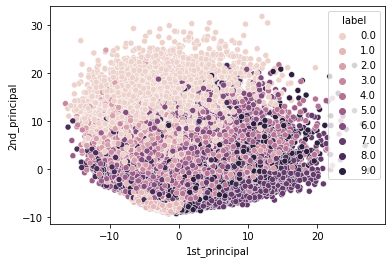

In [13]:
sn.scatterplot(x="1st_principal",y="2nd_principal",legend="full",hue="label",data=dataframe)

# PCA using Scikit-Learn

In [14]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [15]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


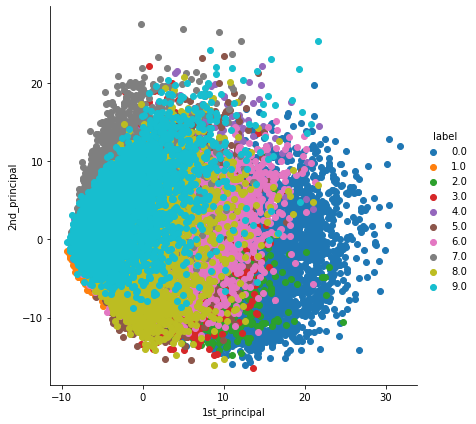

In [17]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality redcution (not for visualization)

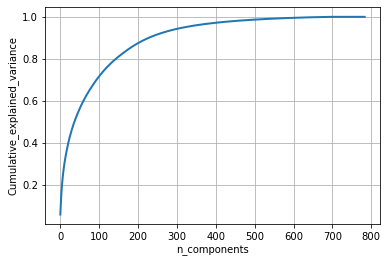

In [18]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.